## **Pesquisa e Ordenação - Atividade 01**
*-**Aluno**: Raquel Maciel Coelho de Sousa* \
*-**Curso**: Engenharia de Computação* \




Crie um Notebook no Google Colab contendo os seguintes elementos: \
a) Gráfico contendo as comparações entre métodos de cálculo do valor de pi.  Para cada método deve ser plotada uma função da variação do valor calculado de pi em função do tamanho da lista. Usar os métodos de simulação, da série de Leibnitz e Wijngaarden. Plotar tudo junto. \
b) Uma função usando a biblioteca numpy para calcular a derivada numérica de qualquer função. \
c) Uma função para calcular o valor da integral numérica de uma função dados um intervalo. \

Não esquecer de dar direito  de leitura para ronaldo@ifce.edu.br

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
def montecarlo(qtd_pontos):
  coordenadas_x = np.random.random(qtd_pontos)
  coordenadas_y = np.random.random(qtd_pontos)
  qtd_dentro_circulo = 0
  for i in range(qtd_pontos):
    x = coordenadas_x[i]
    y = coordenadas_y[i]
    if (x ** 2 + y ** 2 <= 1):
      qtd_dentro_circulo += 1
  return 4 * qtd_dentro_circulo / qtd_pontos

montecarlo(np.random.random() * 1000)

3.1411410706283194

In [ ]:
def leibnitz(qtd_termos):
  um_quarto_de_pi = 0
  for i in range(qtd_termos):
    um_quarto_de_pi += (-1) ** i / (2 * i + 1)
  return 4 * um_quarto_de_pi

leibnitz(np.random.random() * 1000)

3.14159243407265

In [ ]:
def wijngaarden(ind):
  tam = 2*(ind+1)
  pi = []
  linha = []
  for i in range(tam):
    soma = 0
    denominador = 1
    j = 0
    while j <= i:
        if j%2 == 0:
            soma+=4.0/denominador
            denominador+=2
        else:
            soma-=4.0/denominador
            denominador+=2
        j+=1
    linha.append(soma)
  pi.append(linha)
  for j in range(1,tam):
    linha2 = []
    k = 0
    while k < len(linha) -1:
        linha2.append((linha[k]+linha[k+1])/2)
        k+=1
    pi.append(linha2)
    linha = linha2
  return pi[tam//2-1][tam//2-1]


wijngaarden(np.random.random() * 10

            )

3.14159386387681

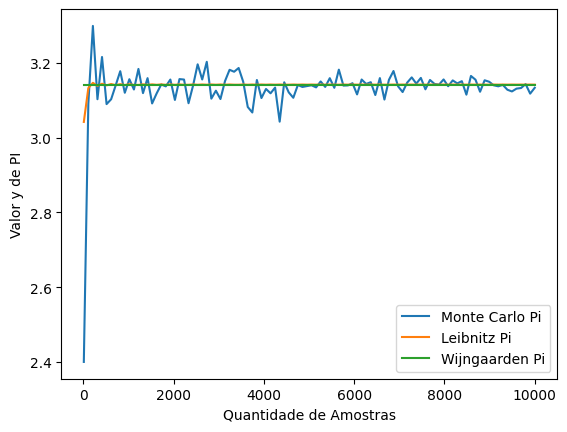

In [ ]:
quantidade_termos = np.linspace(10, 10000, 100, dtype=int)
montecarlo_resultados = [montecarlo(n) for n in quantidade_termos]
leibnitz_resultados = [leibnitz(n) for n in quantidade_termos]
wijngaarden_resultados = [wijngaarden(n) for n in quantidade_termos]

data = {
    "Amostras": quantidade_termos,
    "Monte Carlo Pi": montecarlo_resultados,
    "Leibnitz Pi": leibnitz_resultados,\
    "Wijngaarden Pi": wijngaarden_resultados,
}
df = pd.DataFrame(data)

plt.plot(df["Amostras"], df["Monte Carlo Pi"], label="Monte Carlo Pi")
plt.plot(df["Amostras"], df["Leibnitz Pi"], label="Leibnitz Pi")
plt.plot(df["Amostras"], df["Wijngaarden Pi"], label="Wijngaarden Pi")
plt.xlabel("Quantidade de Amostras")
plt.ylabel("Valor y de PI")
plt.legend()
plt.show()

In [ ]:
import numpy as np

def funcao_teste(x):
  return 10 * x

def derivada(funcao, x, delta_x = 0.000000001):
    # Derivada Centrada
    return (funcao(x+delta_x) - funcao(x-delta_x)) / (2 * delta_x)

x_teste = np.random.random()
print("Derivada centrada na função linear com x no ponto a ", x_teste, derivada(funcao_teste, x_teste))


Derivada centrada na função linear com x tendendo a  0.6533536075092082 9.99999993922529


In [ ]:
import numpy as np
import math

def funcao_teste(x):
  return 10 * x

def integral(funcao, inicio, final):
  x = np.linspace(inicio, final, 100000)
  y = funcao(x)
  integral = np.trapz(y,x)
  return integral

x1, x2 = np.random.random(), np.random.random()
print(f"Integral linear definida de {min(x1, x2)} até {max(x1, x2)}", integral(funcao_teste, min(x1, x2), max(x1, x2)))

Integral linear definida de 0.5040989152650472 até 0.6545376011750781 0.8715187749031416
